In [1]:
from imports import *
import acquire
import wrangle_zillow

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve

# Explore Exercises

## Zillow

Sourcing the Zillow database as the data source, create a jupyter notebook named explore_zillow and do the following:

In [2]:
df = wrangle_zillow.get_zillow()

Reading from csv file...


In [3]:
df.shape

(77381, 67)

In [4]:
df.head().T

,0,1,2,3,4
parcelid,14297519,17052889,14186244,12177905,10887214
airconditioningtypeid,NaN,NaN,NaN,NaN,1.00
architecturalstyletypeid,NaN,NaN,NaN,NaN,NaN
basementsqft,NaN,NaN,NaN,NaN,NaN
bathroomcnt,3.50,1.00,2.00,3.00,3.00
bedroomcnt,4.00,2.00,3.00,4.00,3.00
buildingclasstypeid,NaN,NaN,NaN,NaN,NaN
buildingqualitytypeid,NaN,NaN,NaN,8.00,8.00
calculatedbathnbr,3.50,1.00,2.00,3.00,3.00
decktypeid,NaN,NaN,NaN,NaN,NaN


In [5]:
df = wrangle_zillow.data_prep(df)
df.shape

(77381, 33)

In [6]:
df.isna().sum()

parcelid                             0
bathroomcnt                          0
bedroomcnt                           0
calculatedbathnbr                  609
calculatedfinishedsquarefeet       196
fips                                 0
fullbathcnt                        609
latitude                             0
longitude                            0
lotsizesquarefeet                 8239
propertycountylandusecode            0
propertylandusetypeid                0
rawcensustractandblock               0
regionidcity                      1471
regionidcounty                       0
regionidzip                         50
roomcnt                              0
yearbuilt                          263
structuretaxvaluedollarcnt         112
taxvaluedollarcnt                    1
assessmentyear                       0
landtaxvaluedollarcnt                2
taxamount                            5
logerror                             0
transactiondate                      0
propertylandusedesc      

In [ ]:
df.county_code_bin.value_counts()

In [8]:
#cols_to_explore = ['unitcnt'sqft', 'yearbuilt', ...]

#df = df[cols_to_explore]

In [ ]:
df = df.dropna()

In [ ]:
df.shape

In [ ]:
df.county_code_bin.value_counts()

### 1. 5 questions
- Ask at least 5 questions about the data, 
- keeping in mind that your target variable is logerror. 
    - e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

Answer those questions through a mix of statistical tests and visualizations.

### Questions
- 1. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?
- 2.  Is there a relationship between logerror and zipcode?
- 3. Is there a relationship between logerror and finished square footage of the property in each county?
(small, medium, large, extra large) 
- 4. Is there a relationship between logerror and lot size square footage in each county?
(small, medium, large, extra large) 
- 5. Controlling for property square footage, what is the relationship between logerror and age of the home?

## UNI-VARIATE

What is the distribution of logerror?

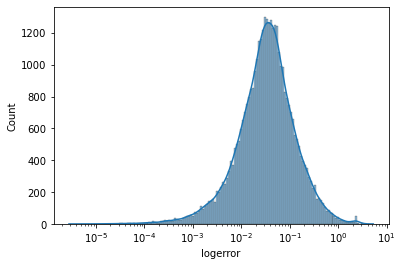

In [12]:
ax = sns.histplot(data=df, x="logerror", kde=True, log_scale=True)

### Split Data

In [13]:
train, validate, test = wrangle_zillow.split(df)

Train: 45516 rows, 33 cols
Validate: 11380 rows, 33 cols
Test: 10041 rows, 33 cols


#### Question 1:

In [14]:
train.fips.value_counts()

6,037.00    32432
6,059.00     9607
6,111.00     3477
Name: fips, dtype: int64

 Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

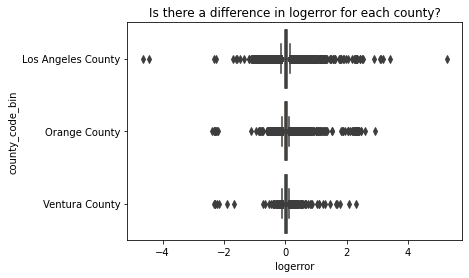

In [15]:
sns.boxplot(train.logerror, train.county_code_bin)
plt.title("Is there a difference in logerror for each county?")
plt.show()

##### Statistical Testing

Continuous & Categorical

#### Question 2:

Is there a relationship between logerror and zipcode?

In [ ]:
sns.boxplot(train.logerror, train.regionidzip)
plt.title("Is there a difference in logerror for each county?")
plt.show()

##### Statistical Testing

#### Question 3:

Is there a relationship between logerror and finished square footage of the property in each county?

In [ ]:
sns.scatterplot(data=train, x='calculatedfinishedsquarefeet', y='logerror', hue = 'county_code_bin')

##### Statistical Testing

- H0: There is no linear relationship between caluclated finished square feet and log error.
- H1: There is a linear relationship between caluclated finished square feet and log error.

In [ ]:
alpha = 0.05
x = train.calculatedfinishedsquarefeet
y = train.logerror
r, p = stats.pearsonr(x, y)
print(f'r = {r:.5f}')
print(f'p = {p:.1f}')

We can reject the null hypothesis that there is no linear relationship between caluclated finished square feet and log error.

#### Question 4:

Is there a relationship between logerror and lot size square footage in each county?
(small, medium, large, extra large) 

In [ ]:
sns.scatterplot(data=train, x='lotsizesquarefeet', y='logerror')

##### Statistical Testing

#### Question 5:

Controlling for property square footage, what is the relationship between logerror and age of the home?

##### Statistical Testing

### Bonus:
- Compute the mean(logerror) by zipcode 

In [ ]:
train.head()

In [ ]:
train.regionidzip.isna().sum()

In [ ]:
train.regionidzip = train.regionidzip.astype(int)

In [ ]:

train.groupby(['regionidzip']).logerror.mean()

- and the overall mean(logerror). 

In [ ]:
train.logerror.mean()

- Write a loop that will run a t-test between the overall mean and the mean for each zip code. 

- We want to identify the zip codes where the error is significantly higher or lower than the expected error.